<a href="https://colab.research.google.com/github/Emiliewu/datascience-assignments/blob/main/week3_day2_Mutibariate_Categorical_Plots_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multivariate Categorical Plots
When to Use?
Multivariate categorical plots should be used when you are comparing:


* Categorical Features (X) vs. a Numeric Target (y)
* Categorical Features (X) vs. a Categorical Target (y)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)

In [3]:
# This filepath will work if you are using the recommended file structure
fname = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/ames-housing-cleaned-eda.csv"
df = pd.read_csv(fname)
df.head()

,PID,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Utilities,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remodeled,Exter Qual,Exter Cond,Bsmt Unf Sqft,Total Bsmnt Sqft,Central Air,Living Area Sqft,Bedroom,Kitchen,Total Rooms,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Fence,SalePrice,Month,Year,Total Full Baths,Total Half Baths
0,907227090,RL,60,7200,Pave,MISSING,AllPub,CollgCr,1Fam,1Story,5,8,1972,1972,TA,TA,427.0,864.0,Y,864.0,3,1,5,Detchd,1977.0,1.0,297.0,TA,TA,Y,MnPrv,119900.0,3,2006,1.0,0.0
1,527108010,RL,134,19378,Pave,MISSING,AllPub,Gilbert,1Fam,2Story,7,5,2005,2006,Gd,TA,1335.0,1392.0,Y,2462.0,4,1,9,Attchd,2006.0,2.0,576.0,TA,TA,Y,MISSING,320000.0,3,2006,3.0,1.0
2,534275170,RL,-1,12772,Pave,MISSING,AllPub,NAmes,1Fam,1Story,6,8,1960,1998,TA,Gd,460.0,958.0,Y,958.0,2,1,5,Attchd,1960.0,1.0,301.0,TA,TA,Y,MISSING,151500.0,4,2007,1.0,0.0
3,528104050,RL,114,14803,Pave,MISSING,AllPub,NridgHt,1Fam,1Story,10,5,2007,2008,Ex,TA,442.0,2078.0,Y,2084.0,2,1,7,Attchd,2007.0,3.0,1220.0,TA,TA,Y,MISSING,385000.0,6,2008,3.0,0.0
4,533206070,FV,32,3784,Pave,Pave,AllPub,Somerst,TwnhsE,1Story,8,5,2006,2007,Gd,TA,1451.0,1511.0,Y,1565.0,2,1,5,Attchd,2006.0,2.0,476.0,TA,TA,Y,MISSING,193800.0,2,2007,3.0,0.0


In [4]:
# Checking how many categories in each categorical column
df.select_dtypes('object').nunique()

MS Zoning        7
Street           2
Alley            3
Utilities        3
Neighborhood    28
Bldg Type        5
House Style      8
Exter Qual       4
Exter Cond       5
Central Air      2
Garage Type      7
Garage Qual      6
Garage Cond      6
Paved Drive      3
Fence            5
dtype: int64

#Categorical Plots - Revisited
We previously introduced univariate categorical plots, such as seaborn's countplot, which plots the value counts for every category in a categorical column.

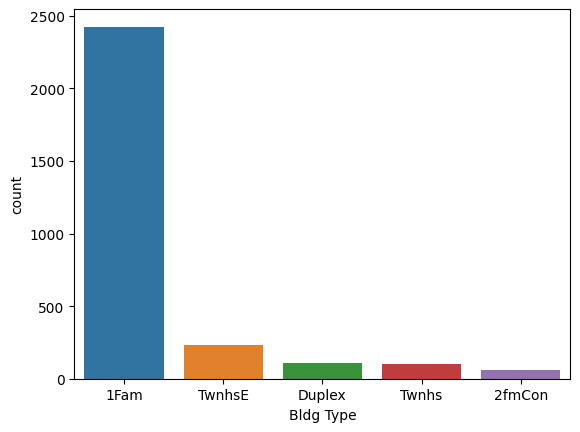

In [5]:
# Univariate countplot
ax = sns.countplot(data=df, x='Bldg Type')

We can expand this univariate countplot to a multivariate one by including another as the hue argument.

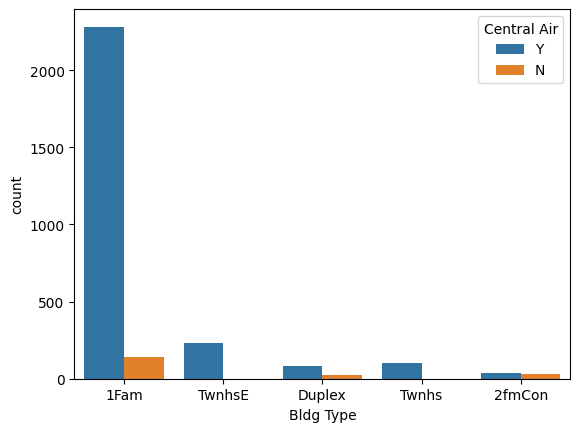

In [6]:
# Multivariate countplot with a hue argument
ax = sns.countplot(data=df, x='Bldg Type', hue='Central Air')

Now we have the counts for each category in x (Bldg Type) split into counts for the homes that had central air ("Y") vs those that did not ("N"). Notice that for single-family homes (1Fam), the majority of them had Central Air. But all Townhouse Units ( both TwnhsE and Twnhs) have Central Air.

# Bar Plots - Revisited
We previously introduced the bar plot, which compares group means vs. a numeric target.

We are going to look at the relationship between Living area and the building type. Let's revisit Seaborn's barplot and explore Seaborn's other categorical plot functions.

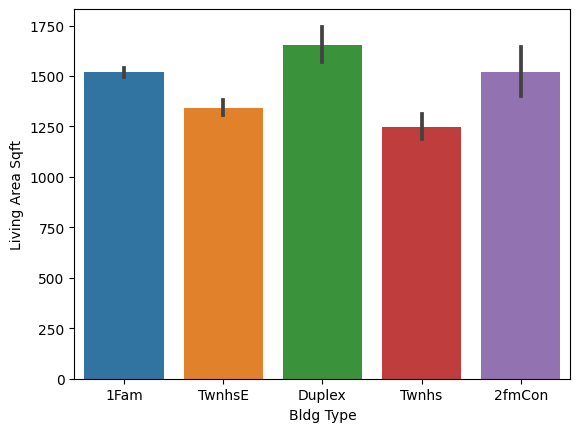

In [7]:
ax = sns.barplot(data=df, x='Bldg Type', y='Living Area Sqft')

Barplots are great for a simple snapshot of group differences, but they can hide important details. Let's change our barplot to Seaborn's stripplot, which is a "categorical scatter plot." Let's add "Bldg Type" as both the x and the hue argument.

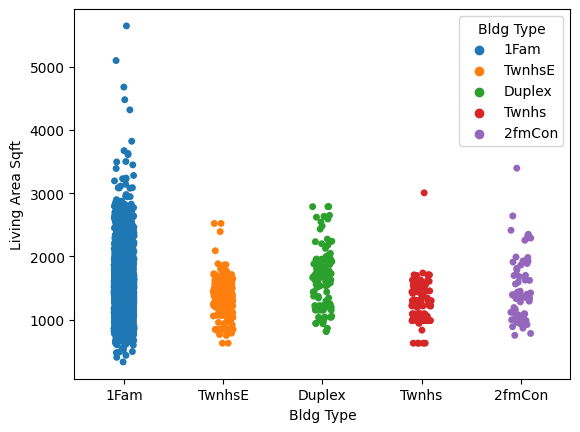

In [10]:
# Stripplot takes the same arguments as barplot
ax = sns.stripplot(data=df, x='Bldg Type', y='Living Area Sqft', hue='Bldg Type')

Notice that we now see individual markers for every home! They are a bit difficult to differentiate. We can change the arguments for edgecolor and linewidth to address this. Let's both: change edgecolor to "white" and change the linewidth to 1

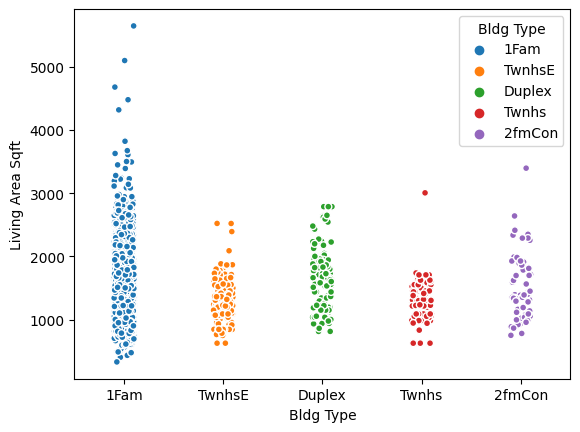

In [11]:
ax = sns.stripplot(data=df, x='Bldg Type', y='Living Area Sqft', hue='Bldg Type', edgecolor='white', linewidth=1)

n this stripplot, we can see every house in the dataset for each group. We can see the full range of values that appear for that type of home. However, we no longer see a measure of centrality - there is no mean or median visible.

# Seaborn's Advanced Categorical Plot: sns.catplot
* Just like seaborn has a more advanced version of regplot called sns.lmplot, which adds functionality and flexibility, there is also an advanced plot for categorical plots called the catplot.
* The catplot will return a FacetGrid instead of an Axes.


The default plot will be a stripplot

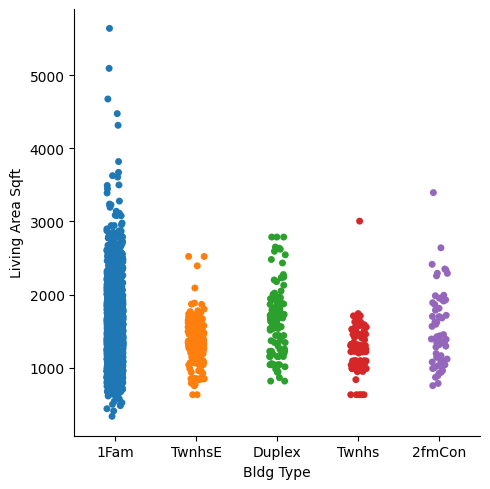

In [12]:
# Catplot with default kind is stripplot
g = sns.catplot(data=df, x='Bldg Type', y='Living Area Sqft', hue='Bldg Type')

We can specify different types of plots using the kind argument. The options for kind are:

* "strip" (default)
* "swarm"
* "bar"
* "count"
* "box"
* "boxen"
* "violin"

## Swarmplot

Swarmplots are a combination of a stripplot and a histogram. Each marker is an individual row and the swarmplot spreads out horizontally when there are overlapping points.

If you change the kind to "swarm", and you have a large dataset (like ours), you will get warnings such as this:

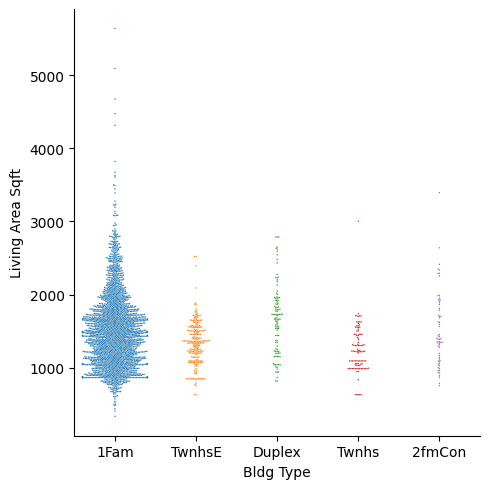

In [13]:
# Using catplot to make a swarmplot, include size argument s=1
g = sns.catplot(data=df, x='Bldg Type', y='Living Area Sqft', hue='Bldg Type', kind='swarm', s=1)

We can create boxplots with catplot as well. Here we will also include the argument dodge = False to eliminate the white space between the boxplots. (You can try running the code without this argument so see the results).

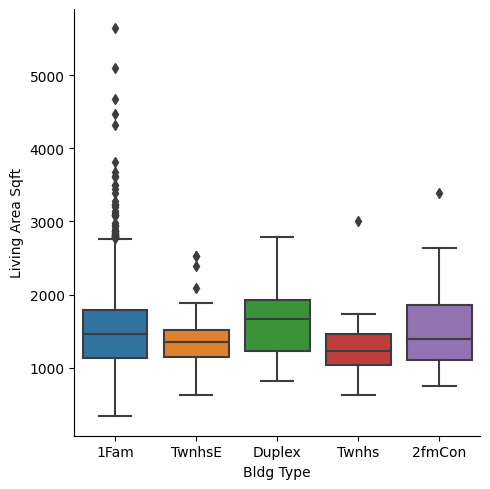

In [14]:
# Using catplot to make a boxplot, adding dodge=False to reduce white space
g = sns.catplot(data=df, x='Bldg Type', y='Living Area Sqft', hue='Bldg Type', kind='box', dodge=False)

## Violin Plot
A violin plot is essentially a histogram reflected. The advantage is that it is supposed to show the same information as a boxplot but in a more attractive manner. Here we will also include the argument dodge = False to eliminate the white space between the violins.

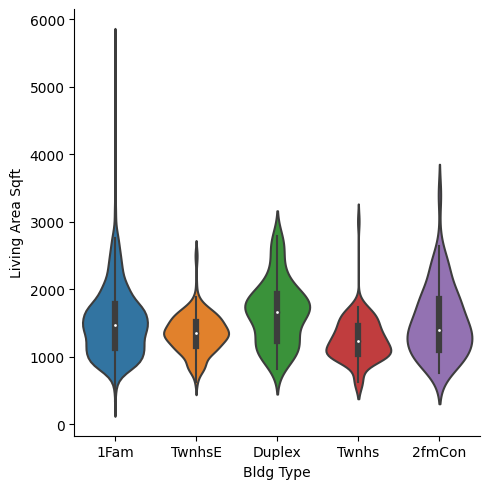

In [15]:
# Using catplot to make a violin plo
g = sns.catplot(data=df, x='Bldg Type', y='Living Area Sqft', hue='Bldg Type', kind='violin', dodge=False)

While a violin plot may be attractive, it is often confusing to stakeholders. A better alternative is a "boxen" plot.

# Boxen Plot

A boxen plot is a fusion between a boxplot and a violin plot. It shows the same central box as the box plot, but then has additional boxes of varying widths to show the nuance of the distribution.

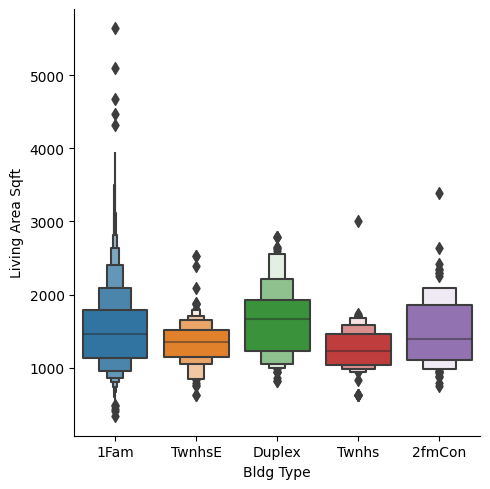

In [16]:
# Using catplot to make a violin plot
g = sns.catplot(data=df, x='Bldg Type', y='Living Area Sqft', hue='Bldg Type', kind='boxen', dodge=False)